<div style='background-image: "intro_pic.png" ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 550px'>
    <div style="float: center ; margin: 50px ; padding: 30px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 250px">
        <div style="position: left ; top: 50% ; transform: translatey(-50%)">
            <img src="images/GTU_LOGO_1200X768_JPG_EN_Small.jpg" style="width:60%"><img>
            <div style="font-size: x-large ; font-weight: 600 ; color: rgba(0 , 0 ,10 , 0.6) ; line-height: 150%">Department of Civil Engineering</div>
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(200 , 0 , 0 , 0.8) ; line-height: 200%">EQE 582_ Introduction to SEISMOLOGY</div>
            <div style="font-size: large ; padding-top: 10px ; color: rgba(0 , 0 , 0 , 0.7); line-height: 150%">Python applications for Seismology</div>
            <img src="images/obspy_logo_full_524x179px.png" style="width:60%"><img>
        </div>
    </div>
</div>

---

Purpose of this notebook is to give a quick introduction about ObsPy which is a python framework developed for seismological data processing. With the help of ObsPy, it east to process comman data formats, get data from data centers and also perform seismological signal proessing. Please visit the link below for detailed information. 

* [Seismo-Live](http://seismo-live.org)

And follow the instructions for [INSTALLATION](https://github.com/obspy/obspy/wiki#installation)

ObsPy Authors:
* Lion Krischer (@krischer)
* Tobias Megies (@megies)

---

## **<font color=darkblue> Waveform Data </font>**

Waveforms with time series in seismology called waveform data and most common formats are **MiniSEED** and **SAC**. ObsPy automatically detects the file format.

![stream](images/Stream_Trace.svg)


### Read and Plot **_MSEED_** data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import obspy

# Read wavform data in MiniSeed format
st = obspy.read("waveform/20201201192002_ZEDA_H.mseed")
print(st)

3 Trace(s) in Stream:
TU.ZEDA..HHE | 2020-12-01T19:19:18.110000Z - 2020-12-01T19:23:25.340000Z | 100.0 Hz, 24724 samples
TU.ZEDA..HHN | 2020-12-01T19:19:18.600000Z - 2020-12-01T19:23:24.230000Z | 100.0 Hz, 24564 samples
TU.ZEDA..HHZ | 2020-12-01T19:19:18.780000Z - 2020-12-01T19:23:27.390000Z | 100.0 Hz, 24862 samples


In [2]:
# Fileformat specific information is also stored.
print(st[2].stats.mseed)

AttribDict({'dataquality': 'D', 'number_of_records': 71, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 113152})


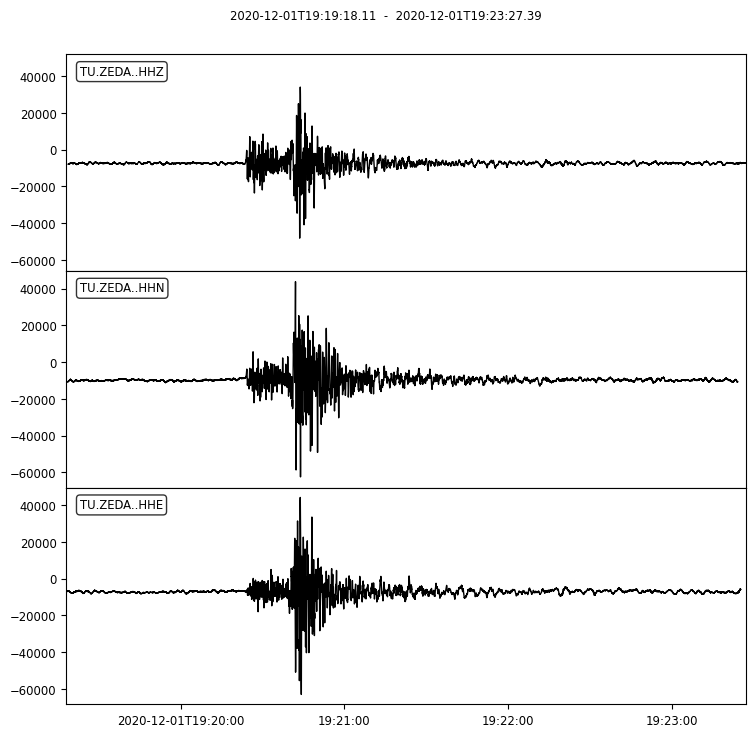

In [3]:
fig = st.plot()

### Read and Plot **_SAC_** data

SAC type of data format is a widely used format and there is SAC Code which is an Seismic Analysis Code using for data processing in SAC format.

In [4]:
st = obspy.read("waveform/KO.KUSD..HNE.D.2020.304.115012.SAC")
print(st)
st[0].stats.sac.__dict__

1 Trace(s) in Stream:
KO.KUSD..HNE | 2020-10-30T11:50:12.660000Z - 2020-10-30T11:55:07.650000Z | 100.0 Hz, 29500 samples


{'delta': 0.0099999998,
 'b': 0.0,
 'e': 294.98999,
 'nzyear': 2020,
 'nzjday': 304,
 'nzhour': 11,
 'nzmin': 50,
 'nzsec': 12,
 'nzmsec': 660,
 'nvhdr': 6,
 'npts': 29500,
 'iftype': 1,
 'leven': 1,
 'kstnm': 'KUSD',
 'kcmpnm': 'HNE',
 'knetwk': 'KO',
 'kevnm': ''}

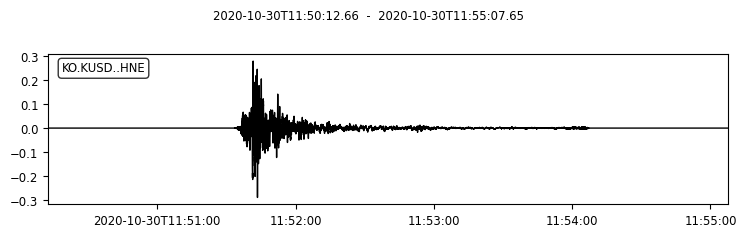

In [5]:
fig = st.plot()

---

## **<font color=darkgreen> Coordinated Universal Time</font>**

**_UTCDateTime_** refers to set up timezone base on universal coordinates. It is necessery to know and used everywhere in ObsPy. Its unit in nanoseconds.


In [6]:
# Current time can be initialized by leaving out any arguments
from obspy import UTCDateTime

print(UTCDateTime())

2020-12-09T22:49:55.298246Z


In [7]:
from obspy import UTCDateTime

print(UTCDateTime("2011-03-11T05:46:23.2"))        # mostly time strings defined by ISO standard
print(UTCDateTime("2011-03-11T14:46:23.2+09:00"))  # non-UTC timezone input
print(UTCDateTime(2011, 3, 11, 5, 46, 23, 2))
print(UTCDateTime(1299822383.2))

2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.000002Z
2011-03-11T05:46:23.200000Z


In [8]:
time = UTCDateTime("2011-03-11T05:46:23.200000Z")
print(time.year)
print(time.julday)
print(time.timestamp)
print(time.weekday)
# try time.<Tab>

2011
70
1299822383.2
4


---

## **<font color=darkyellow> Station Data </font>**

It contains instrumental information with geographical and also organizational information.Most common formats are (dataless) SEED, RESP (ASCII based dataless SEED) and Station XML (similar but simpler SEED type). ObsPy can work with all of them.

![inv](images/Inventory.svg)


---

## **<font color=orange> Event Data</font>**

Event files may contain detailed information about an earthquake or it may a simple text file. The main event file insist the location, time, depth and magnitude of a given earthquake. 

Datacenters provide different type of Event file formats but for the very common ones, Obspy has function th process them. 

![events](./images/Event.svg)

---
# **<font color=purple> Routine Data Processing in Seismology with ObsPy </font>**

Lets read all **_mseed_** files in my database

In [9]:
from obspy import read
st = read("waveform/*.mseed", format="mseed")
print(st)

21 Trace(s) in Stream:

KO.KRBN..HNZ | 2020-12-01T19:19:14.440000Z - 2020-12-01T19:22:52.150000Z | 100.0 Hz, 21772 samples
...
(19 other traces)
...
TU.ZEYE..HHZ | 2020-12-01T19:19:09.030000Z - 2020-12-01T19:22:13.220000Z | 100.0 Hz, 18420 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


* read waveform data is returned as a **`Stream`** object, so, no need to worry about file format. Automatic file format detection currently supported.

In [10]:
# no need to specify data format 

from obspy import read

st = read("waveform/*")  # read both SAC and MSEED data from database
print(st)

33 Trace(s) in Stream:

KO.KRBN..HNZ | 2020-12-01T19:19:14.440000Z - 2020-12-01T19:22:52.150000Z | 100.0 Hz, 21772 samples
...
(31 other traces)
...
KO.SMAA..HNZ | 2020-10-30T11:51:09.450000Z - 2020-10-30T11:54:44.440000Z | 100.0 Hz, 21500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [11]:
st1 = read("waveform/KO.KUSD*HNN*")
tr1 = st1[0]  # get the first Trace in the Stream
print(tr1.stats)

         network: KO
         station: KUSD
        location: 
         channel: HNN
       starttime: 2020-10-30T11:50:12.660000Z
         endtime: 2020-10-30T11:55:07.650000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 29500
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.0099999998, 'b': 0.0, 'e': 294.98999, 'nzyear': 2020, 'nzjday': 304, 'nzhour': 11, 'nzmin': 50, 'nzsec': 12, 'nzmsec': 660, 'nvhdr': 6, 'npts': 29500, 'iftype': 1, 'leven': 1, 'kstnm': 'KUSD', 'kcmpnm': 'HNN', 'knetwk': 'KO', 'kevnm': ''})


In [12]:
print(tr1.stats._format, "|", tr1.stats.endtime, "|", tr1.stats.station)

SAC | 2020-10-30T11:55:07.650000Z | KUSD


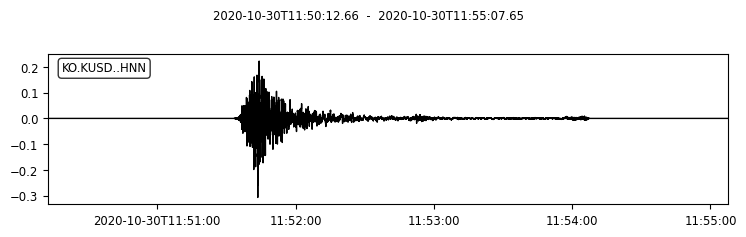

In [13]:
fig = tr1.plot()

In [14]:
tr1.resample(sampling_rate=50.0)
print(tr1)

KO.KUSD..HNN | 2020-10-30T11:50:12.660000Z - 2020-10-30T11:55:07.640000Z | 50.0 Hz, 14750 samples


2020-10-30T11:51:32.660000Z | 2020-10-30T11:52:12.660000Z


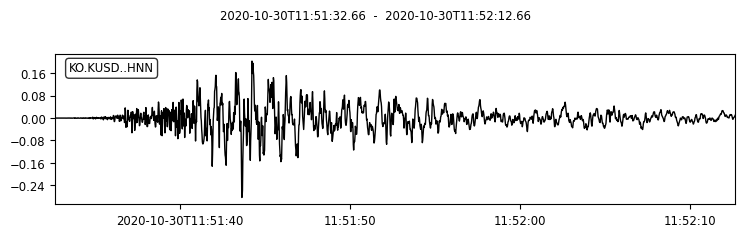

In [15]:
tr1.trim(tr1.stats.starttime + 80, tr1.stats.starttime + 2 * 60)

print(tr1.stats.starttime, "|", tr1.stats.endtime)
fig = tr1.plot()

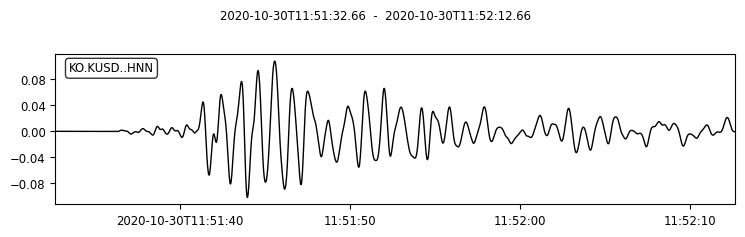

In [16]:
# Some basic processing. Please note that these modify the
# existing object.

tr1.detrend("linear")
tr1.filter("bandpass", freqmin=0.08, freqmax=1.6)

fig = tr1.plot()

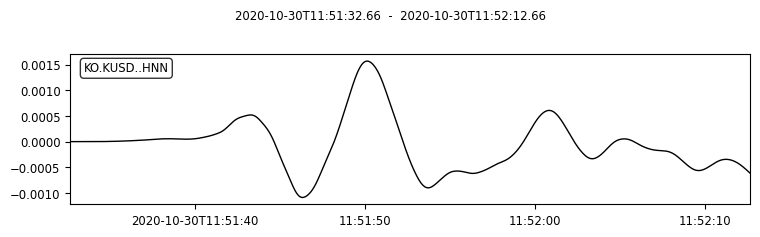

In [17]:
tr1.detrend("linear")
tr1.taper(max_percentage=0.05, type='cosine')
tr1.filter("lowpass", freq=0.1)
fig = tr1.plot()

In [18]:
print(tr1.data.max())
print(tr1.data.mean())

0.00157056658036
-6.19050409411e-05


---
# **<font color=magenta> Create synthetic pulse signal</font>**


.GTU.AKM.HNZ.. | 2020-05-31T10:30:00.000000Z - 2020-05-31T10:30:09.980000Z | 50.0 Hz, 500 samples


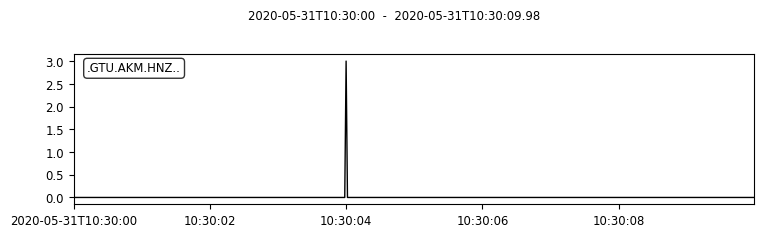

In [19]:
# we will use numpy to create an array with zeros and will put a pulse in it somewhere
import numpy as np
from obspy import Trace
from obspy import Stream
from obspy import UTCDateTime

x = np.zeros(500)
x[200] = 3.0
tr = Trace(data=x)
tr.stats.starttime = UTCDateTime(2020, 5, 31, 10, 30, 0)
tr.stats.station = "GTU.AKM.HNZ"
tr.stats.sampling_rate = 50.0

print(tr)
fig = tr.plot()

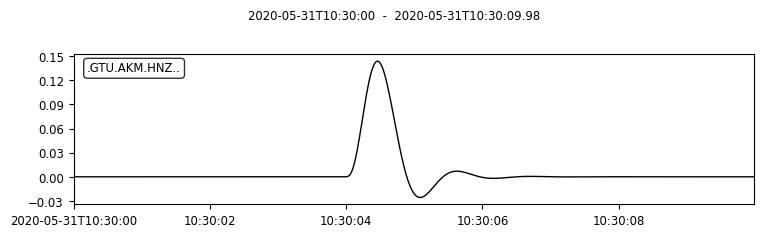

In [20]:
tr.filter("lowpass", freq=1)
fig = tr.plot()

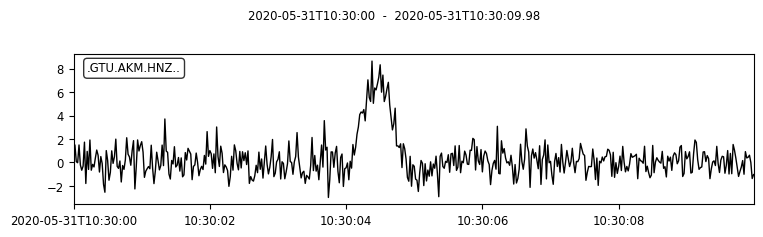

In [21]:
tr.data = tr.data * 50
tr.data = tr.data + np.random.randn(len(tr))
fig = tr.plot()

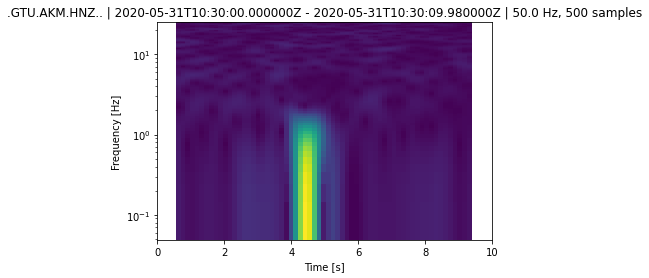

In [22]:
tr.spectrogram(log=True, wlen=50);

In [23]:
# You can write it again by simply specifing the format.
#st.write("synthetic.mseed", format="mseed")
#st.write("synthetic.sac", format="sac")


---